In [1]:
!where python

C:\Users\Anurag\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\Anurag\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\Anurag\AppData\Local\Microsoft\WindowsApps\python.exe


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Paths and parameters
data_path = r'D:\AI Algorithm\cucumber'
categories = ['Healthy', 'Unhealthy']
image_size = (64, 64)

# Load and preprocess data
X, y = [], []
for label, category in enumerate(categories):
    category_path = os.path.join(data_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image is not None:
            image_resized = cv2.resize(image, image_size)
            X.append(image_resized)
            y.append(label)

X = np.array(X)
y = np.array(y)

# Normalize image data
X = X / 255.0

# One-hot encode labels
y = to_categorical(y, num_classes=len(categories))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Input(shape=(64, 64, 3)),  # Explicitly define the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming binary classification (healthy/unhealthy)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6479 - loss: 0.7917 - val_accuracy: 0.7838 - val_loss: 0.4669
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.6814 - loss: 0.5760 - val_accuracy: 0.7838 - val_loss: 0.3797
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6980 - loss: 0.4493 - val_accuracy: 0.8919 - val_loss: 0.3685
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8370 - loss: 0.3530 - val_accuracy: 0.8811 - val_loss: 0.3045
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8954 - loss: 0.2733 - val_accuracy: 0.9027 - val_loss: 0.2433
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9211 - loss: 0.2174 - val_accuracy: 0.8919 - val_loss: 0.2718
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9207 - loss: 0.1969 - val_accuracy: 0.9189 - val_loss: 0.1820
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9513 - loss: 0.1315 - val_accuracy: 0.9243 - v

In [5]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    explained_variance_score,
    r2_score
)
import numpy as np

# Convert one-hot encoded y_test to single-class labels
y_test_single = np.argmax(y_test, axis=1)  # Convert to integer labels

# Make predictions on the test data
y_pred_probs = model.predict(X_test)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class labels

# Calculate metrics
accuracy = accuracy_score(y_test_single, y_pred)
precision = precision_score(y_test_single, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test_single, y_pred, average='weighted')
f1 = f1_score(y_test_single, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')  # AUC for multiclass
conf_matrix = confusion_matrix(y_test_single, y_pred)
mae = mean_absolute_error(y_test_single, y_pred)
mse = mean_squared_error(y_test_single, y_pred)
rmse = np.sqrt(mse)

# Additional custom metrics
mape = np.mean(np.abs((y_test_single - y_pred) / (y_test_single + 1e-10))) * 100  # Mean Absolute Percentage Error
smape = 100 * np.mean(2 * np.abs(y_test_single - y_pred) / (np.abs(y_test_single) + np.abs(y_pred) + 1e-10))  # Symmetric MAPE
explained_var = explained_variance_score(y_test_single, y_pred)
r2 = r2_score(y_test_single, y_pred)
mbd = np.mean(y_test_single - y_pred) / (np.mean(y_test_single) + 1e-10)  # Mean Bias Deviation

# Print the metrics
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1-Score:", round(f1, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:\n", conf_matrix)
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 2))
print("Symmetric Mean Absolute Percentage Error (SMAPE):", round(smape, 2))
print("Explained Variance Score:", round(explained_var, 2))
print("R^2 Score:", round(r2, 2))
print("Mean Bias Deviation (MBD):", round(mbd, 2))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1-Score: 0.93
AUC: 0.99
Confusion Matrix:
 [[ 60  10]
 [  5 156]]
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
Mean Absolute Percentage Error (MAPE): 43290043292.21
Symmetric Mean Absolute Percentage Error (SMAPE): 12.99
Explained Variance Score: 0.69
R^2 Score: 0.69
Mean Bias Deviation (MBD): -0.03


In [6]:
# Save the model
model.save('cnn_cucumber_classifier.h5')
# Save the model in the recommended Keras format
model.save("cucumber_leaf_model.keras")  # Save in the .keras format
print("Model saved successfully!")


Model saved successfully!


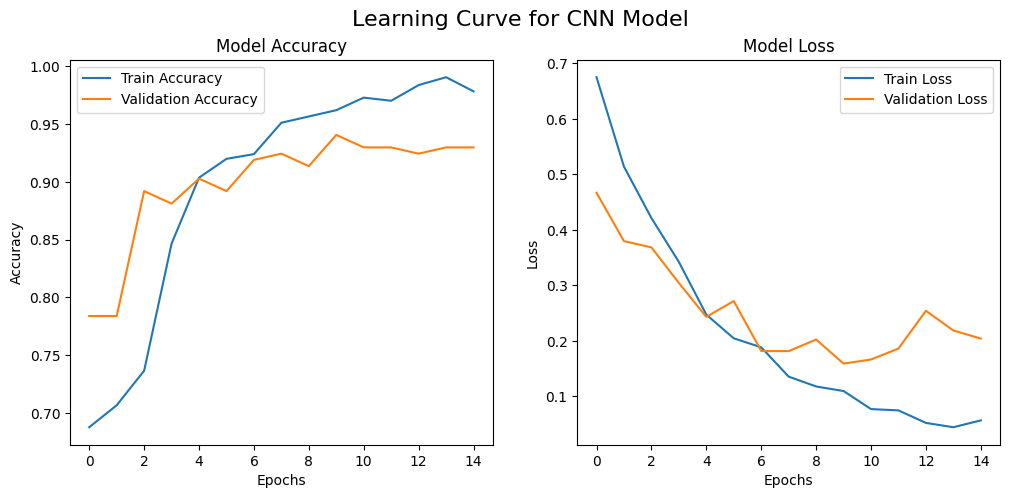

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.suptitle('Learning Curve for CNN Model', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()